In [34]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

## 1. Data Preparation:

In [11]:
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


In [12]:
X = X / 255.0 
y = y.astype(np.int64)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 2. Model Training:

In [14]:
models = {
"Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, solver="lbfgs", n_jobs=-1),
"SVM": SVC(random_state=42),
"Decision Tree": DecisionTreeClassifier(random_state=42),
"Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_jobs=-1)
}


results = {}
misclassified_samples = {}

## 3. Model Evaluation:

In [19]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)


    results[name] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"{name} Classification Report:\n", results[name]['report'])

    mis_idx = np.where(y_test != y_pred)[0]
    misclassified_samples[name] = (X_test[mis_idx], y_test[mis_idx], y_pred[mis_idx])

print("\nModel Accuracies:")
for name in results:
    print(f"{name}: {results[name]['accuracy']:.2f}")


Training Logistic Regression...
Logistic Regression Classification Report:
 {'0': {'precision': 0.9498233215547703, 'recall': 0.9732078204199855, 'f1-score': 0.9613733905579399, 'support': 1381.0}, '1': {'precision': 0.9521739130434783, 'recall': 0.9733333333333334, 'f1-score': 0.9626373626373627, 'support': 1575.0}, '2': {'precision': 0.9263080324244657, 'recall': 0.8991416309012875, 'f1-score': 0.9125226860254083, 'support': 1398.0}, '3': {'precision': 0.8975265017667845, 'recall': 0.8893557422969187, 'f1-score': 0.8934224410833627, 'support': 1428.0}, '4': {'precision': 0.9303187546330616, 'recall': 0.9194139194139194, 'f1-score': 0.924834193072955, 'support': 1365.0}, '5': {'precision': 0.8830128205128205, 'recall': 0.8725257323832145, 'f1-score': 0.8777379530067703, 'support': 1263.0}, '6': {'precision': 0.9385275196568977, 'recall': 0.9549090909090909, 'f1-score': 0.946647440519106, 'support': 1375.0}, '7': {'precision': 0.931710615280595, 'recall': 0.9444825222755312, 'f1-score

c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:18:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
 {'0': {'precision': 0.9772079772079773, 'recall': 0.9934829833454019, 'f1-score': 0.985278276481149, 'support': 1381.0}, '1': {'precision': 0.9848005066497784, 'recall': 0.9873015873015873, 'f1-score': 0.9860494610019024, 'support': 1575.0}, '2': {'precision': 0.9778095919828204, 'recall': 0.977110157367668, 'f1-score': 0.9774597495527728, 'support': 1398.0}, '3': {'precision': 0.9788135593220338, 'recall': 0.9705882352941176, 'f1-score': 0.9746835443037974, 'support': 1428.0}, '4': {'precision': 0.9778761061946902, 'recall': 0.9714285714285714, 'f1-score': 0.9746416758544653, 'support': 1365.0}, '5': {'precision': 0.9823293172690764, 'recall': 0.9683293745051464, 'f1-score': 0.9752791068580542, 'support': 1263.0}, '6': {'precision': 0.9755043227665706, 'recall': 0.9847272727272727, 'f1-score': 0.9800941006152732, 'support': 1375.0}, '7': {'precision': 0.9760601915184679, 'recall': 0.978067169294037, 'f1-score': 0.9770626497774735, 'support': 1459.0}, '8

## 4. Error Analysis:


Misclassified Samples for Logistic Regression:


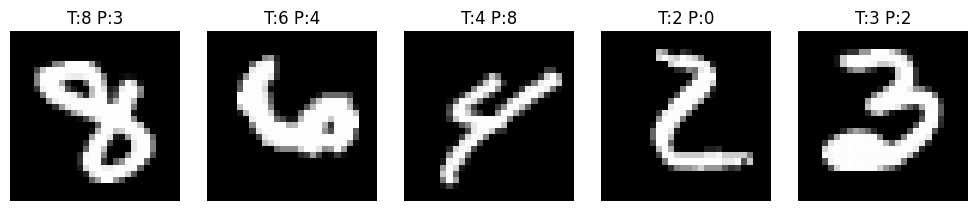


Misclassified Samples for SVM:


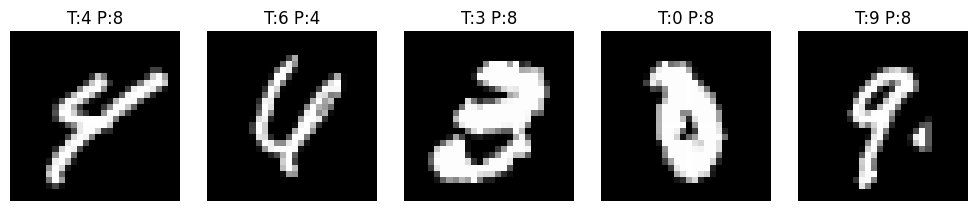


Misclassified Samples for Decision Tree:


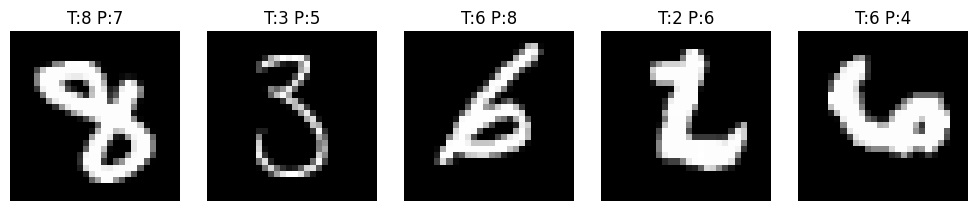


Misclassified Samples for Random Forest:


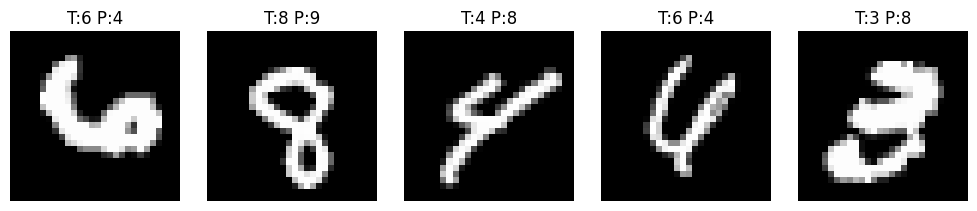


Misclassified Samples for XGBoost:


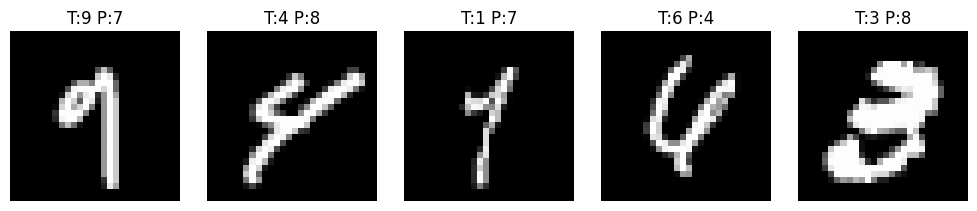

In [25]:
for name, (X_mis, y_true, y_pred) in misclassified_samples.items():
    print(f"\nMisclassified Samples for {name}:")
    plt.figure(figsize=(10,4))
    for i in range(4):
        if i >= len(X_mis):
            break
        plt.subplot(2, 5, i+1)
        plt.imshow(X_mis[i].reshape(28,28), cmap='gray')
        plt.title(f"T:{y_true[i]} P:{y_pred[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## 5. Output & Visualization:

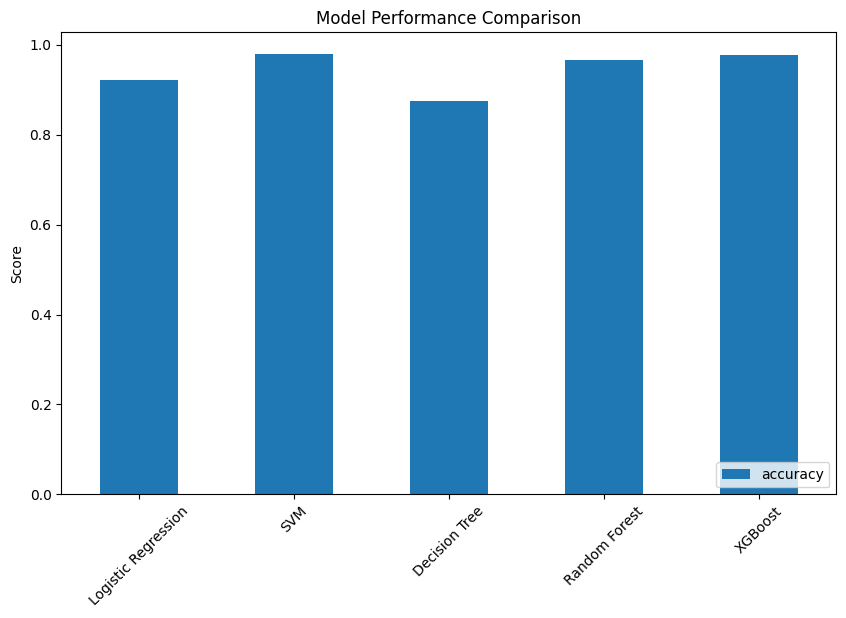

In [36]:
results_df = pd.DataFrame(results).T
results_df[["accuracy"]].plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()